# Assignment Q1 – Gradient Descent and Momentum


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# --- Dataset 1 Generation ---
num_samples_1 = 40
np.random.seed(45)
x1_d1 = np.random.uniform(-20, 20, num_samples_1)
f_x_d1 = 100 * x1_d1 + 1
eps_d1 = np.random.randn(num_samples_1)
y_d1 = f_x_d1 + eps_d1
# Add a bias term (x0=1) to the input
X_d1 = np.c_[np.ones(num_samples_1), x1_d1]
theta_true_d1 = np.array([1, 100]) # True parameters [theta_0, theta_1]

# --- Dataset 2 Generation ---
num_samples_2 = 40
np.random.seed(45)
x1_d2 = np.random.uniform(-1, 1, num_samples_2)
f_x_d2 = 3 * x1_d2 + 4
eps_d2 = np.random.randn(num_samples_2)
y_d2 = f_x_d2 + eps_d2
# Add a bias term (x0=1) to the input
X_d2 = np.c_[np.ones(num_samples_2), x1_d2]
theta_true_d2 = np.array([4, 3]) # True parameters [theta_0, theta_1]

print("Dataset 1 Shapes: X={}, y={}".format(X_d1.shape, y_d1.shape))
print("Dataset 2 Shapes: X={}, y={}".format(X_d2.shape, y_d2.shape))

Dataset 1 Shapes: X=(40, 2), y=(40,)
Dataset 2 Shapes: X=(40, 2), y=(40,)


In [30]:
def full_batch_gradient_descent(X, y, theta_true, learning_rate=0.0001, epsilon=0.001, max_epochs=10000):
    """
    Performs full-batch gradient descent for linear regression.
    """
    theta = np.array([0.0, 1.0])
    m = len(y)
    history = [theta]
    loss_history = []
    steps = 0

    for epoch in range(max_epochs):
        gradient = (2/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradient
        history.append(theta)
        loss = np.mean((X.dot(theta) - y)**2)
        loss_history.append(loss)
        steps += 1
        if np.linalg.norm(theta - theta_true) < epsilon:
            break

    return theta, np.array(history), loss_history, steps

def stochastic_gradient_descent(X, y, theta_true, learning_rate=0.01, epsilon=0.001, max_epochs=100):
    """
    Performs stochastic gradient descent for linear regression.
    """
    theta = np.array([0.0, 1.0]) 
    m = len(y)
    history = [theta]
    loss_history = []
    steps = 0

    for epoch in range(max_epochs):
        epoch_loss = 0
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[i:i+1]
            yi = y[i:i+1]

            gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradient
            history.append(theta)
            steps += 1

            if np.linalg.norm(theta - theta_true) < epsilon:
                # Calculate final loss and return
                final_loss = np.mean((X.dot(theta) - y)**2)
                loss_history.append(final_loss)
                return theta, np.array(history), loss_history, steps

        # Record loss at the end of each epoch
        current_loss = np.mean((X.dot(theta) - y)**2)
        loss_history.append(current_loss)

    return theta, np.array(history), loss_history, steps

In [31]:
# Convergence threshold
epsilon = 0.001

# --- Dataset 1 ---
# Note: A smaller learning rate is needed for Dataset 1 due to its scale
theta_gd1, history_gd1, loss_gd1, steps_gd1 = full_batch_gradient_descent(X_d1, y_d1, theta_true_d1, learning_rate=0.001, epsilon=epsilon)
theta_sgd1, history_sgd1, loss_sgd1, steps_sgd1 = stochastic_gradient_descent(X_d1, y_d1, theta_true_d1, learning_rate=0.001, epsilon=epsilon)

# --- Dataset 2 ---
theta_gd2, history_gd2, loss_gd2, steps_gd2 = full_batch_gradient_descent(X_d2, y_d2, theta_true_d2, learning_rate=0.01, epsilon=epsilon)
theta_sgd2, history_sgd2, loss_sgd2, steps_sgd2 = stochastic_gradient_descent(X_d2, y_d2, theta_true_d2, learning_rate=0.01, epsilon=epsilon)


print("--- Convergence Results (Vanilla Gradient Descent) ---")
print(f"Dataset 1 - Full-Batch GD steps: {steps_gd1}")
print(f"Dataset 1 - Stochastic GD steps: {steps_sgd1}")
print("-" * 20)
print(f"Dataset 2 - Full-Batch GD steps: {steps_gd2}")
print(f"Dataset 2 - Stochastic GD steps: {steps_sgd2}")

--- Convergence Results (Vanilla Gradient Descent) ---
Dataset 1 - Full-Batch GD steps: 10000
Dataset 1 - Stochastic GD steps: 1957
--------------------
Dataset 2 - Full-Batch GD steps: 10000
Dataset 2 - Stochastic GD steps: 4000


In [32]:
# Function to average convergence steps over multiple runs
def average_convergence_steps(X, y, theta_true, gradient_descent_func, n_runs=10, **kwargs):
    """
    Runs a gradient descent algorithm multiple times and returns the average number of steps.
    """
    total_steps = 0
    for _ in range(n_runs):
        # We use random initialization for each run, which is good practice
        # theta_initial = np.random.randn(X.shape[1]) # This line is not needed
        _, _, _, steps = gradient_descent_func(X, y, theta_true, **kwargs) # Removed theta_initial argument
        total_steps += steps
    return total_steps / n_runs
    # # This is what you have now
# _, _, steps_gd1, _ = full_batch_gradient_descent(...)
# _, _, steps_sgd1, _ = stochastic_gradient_descent(...)
epsilon = 0.001

# --- Calculate Average Steps for Dataset 1 ---
avg_steps_gd1 = average_convergence_steps(
    X_d1, y_d1, theta_true_d1, full_batch_gradient_descent,
    learning_rate=0.001, epsilon=epsilon
)
avg_steps_sgd1 = average_convergence_steps(
    X_d1, y_d1, theta_true_d1, stochastic_gradient_descent,
    learning_rate=0.001, epsilon=epsilon
)

# --- Calculate Average Steps for Dataset 2 ---
avg_steps_gd2 = average_convergence_steps(
    X_d2, y_d2, theta_true_d2, full_batch_gradient_descent,
    learning_rate=0.01, epsilon=epsilon
)
avg_steps_sgd2 = average_convergence_steps(
    X_d2, y_d2, theta_true_d2, stochastic_gradient_descent,
    learning_rate=0.01, epsilon=epsilon
)


# --- Print the results ---
print("--- Average Convergence Steps (over 10 runs) ---")
print(f"Dataset 1 - Full-Batch GD: {avg_steps_gd1:.2f}")
print(f"Dataset 1 - Stochastic GD: {avg_steps_sgd1:.2f}")
print(f"Dataset 2 - Full-Batch GD: {avg_steps_gd2:.2f}")
print(f"Dataset 2 - Stochastic GD: {avg_steps_sgd2:.2f}")

--- Average Convergence Steps (over 10 runs) ---
Dataset 1 - Full-Batch GD: 10000.00
Dataset 1 - Stochastic GD: 1957.00
Dataset 2 - Full-Batch GD: 10000.00
Dataset 2 - Stochastic GD: 4000.00


In [33]:
def plot_contour_and_path(X, y, history, theta_true, title, max_epochs=15):
    """
    Creates a contour plot of the loss function and overlays the optimization path.
    """
    # Create a grid of theta values
    theta0_vals = np.linspace(theta_true[0] - 10, theta_true[0] + 10, 100)
    theta1_vals = np.linspace(theta_true[1] - 10, theta_true[1] + 10, 100)
    if "Dataset 1" in title:  # Adjust range for Dataset 1's scale
        theta0_vals = np.linspace(theta_true[0] - 50, theta_true[0] + 50, 100)
        theta1_vals = np.linspace(theta_true[1] - 500, theta_true[1] + 500, 100)
        contour_levels = np.logspace(2, 10, 30)
    else:
        contour_levels = np.logspace(-1, 3, 30)

    T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

    # Calculate loss for each point on the grid
    J = np.array([np.mean((X.dot(np.array([t0, t1])) - y)**2) for t0, t1 in zip(np.ravel(T0), np.ravel(T1))])
    J = J.reshape(T0.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(T0, T1, J, levels=contour_levels, cmap='viridis')


    # Plot the path
    path = history[:max_epochs+1] # Limit to first 15 epochs for visualization
    plt.plot(path[:, 0], path[:, 1], 'r-o', label='Optimization Path')
    plt.plot(theta_true[0], theta_true[1], 'g*', markersize=15, label='True Minimum')
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_loss(loss_history, title, max_epochs=15):
    """
    Plots the loss versus the number of epochs.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(range(min(len(loss_history), max_epochs)), loss_history[:max_epochs], 'b-')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (Loss)')
    plt.title(title)
    plt.grid(True)
    plt.show()


--- Visualizations for Vanilla GD and SGD ---


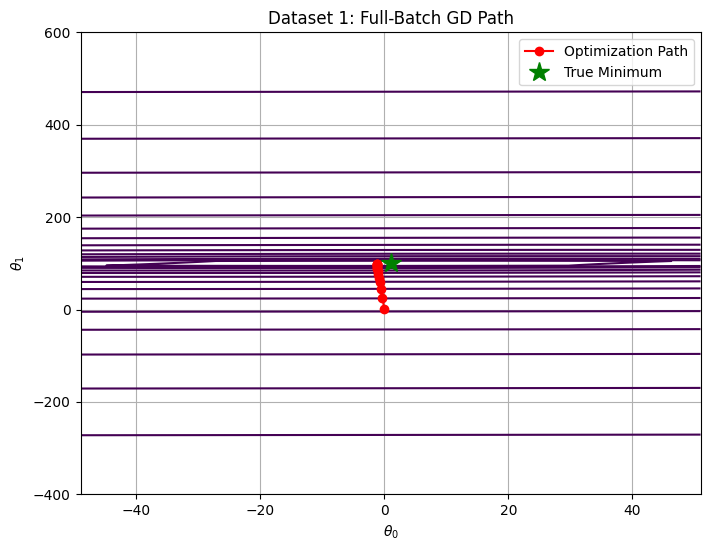

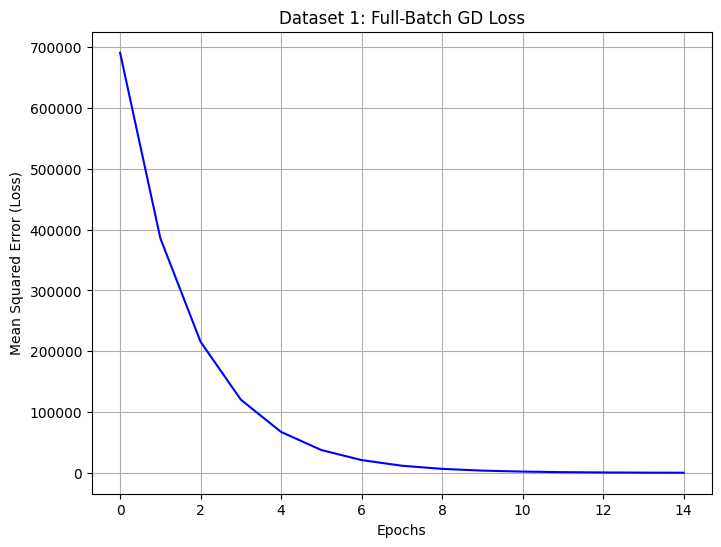

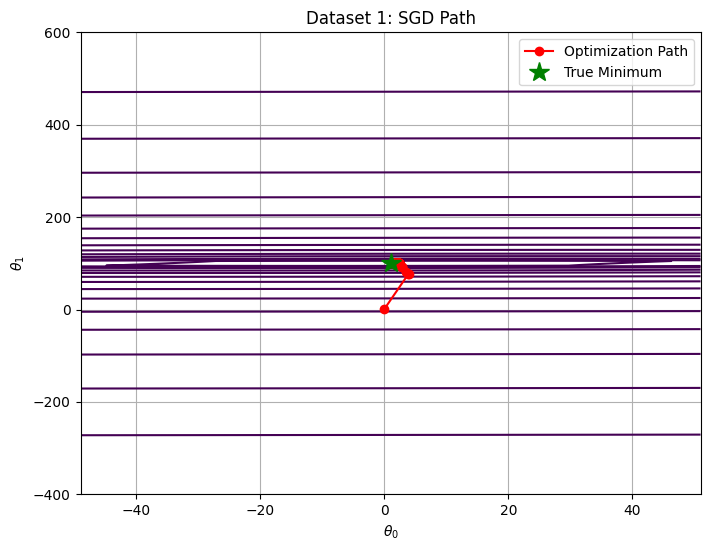

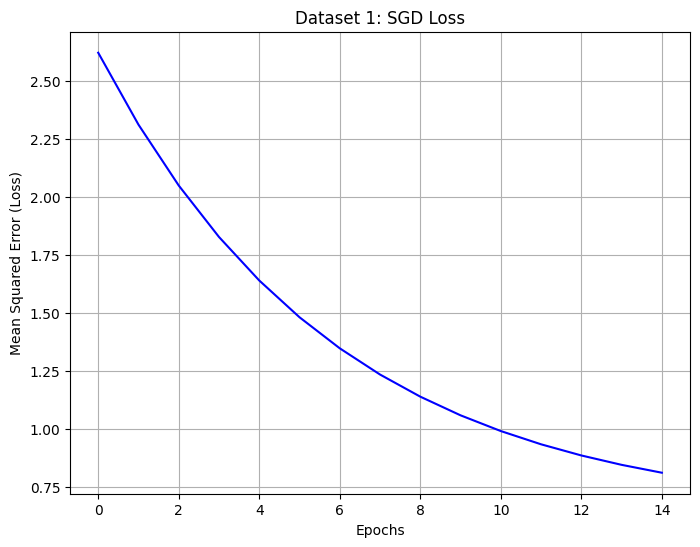

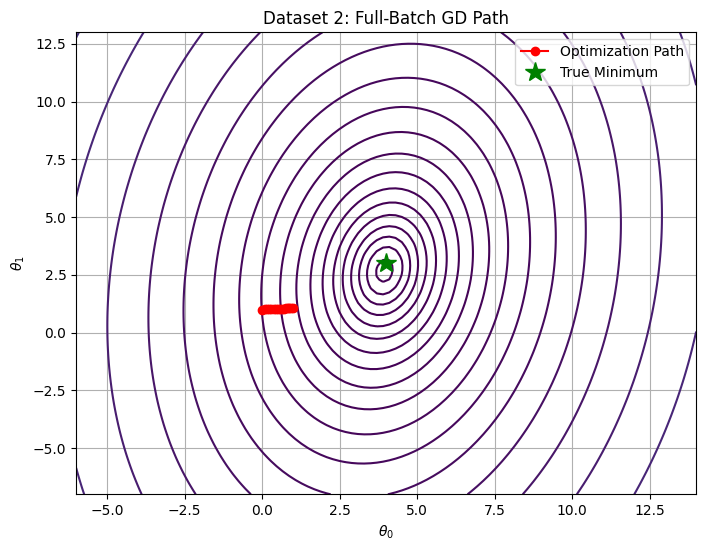

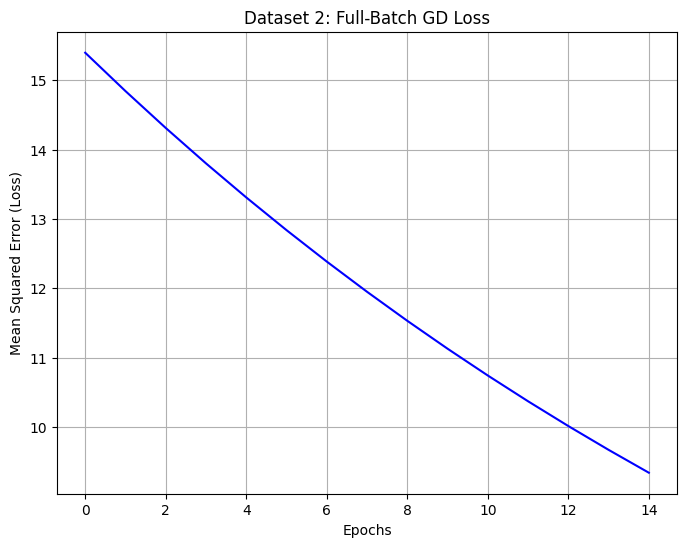

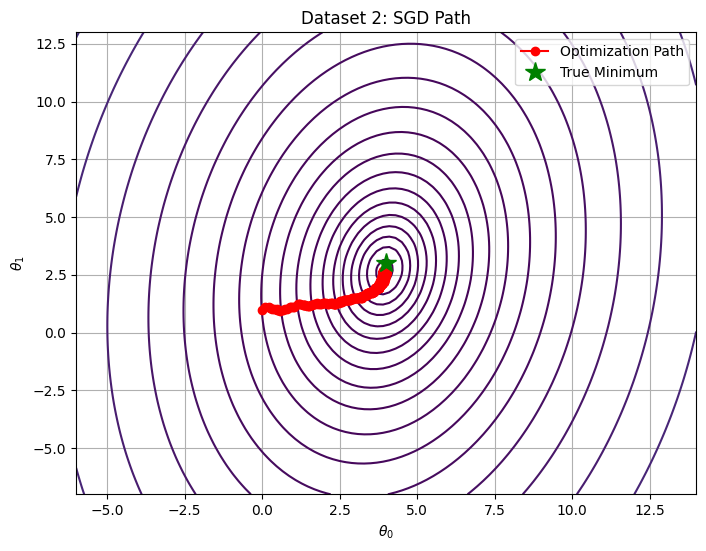

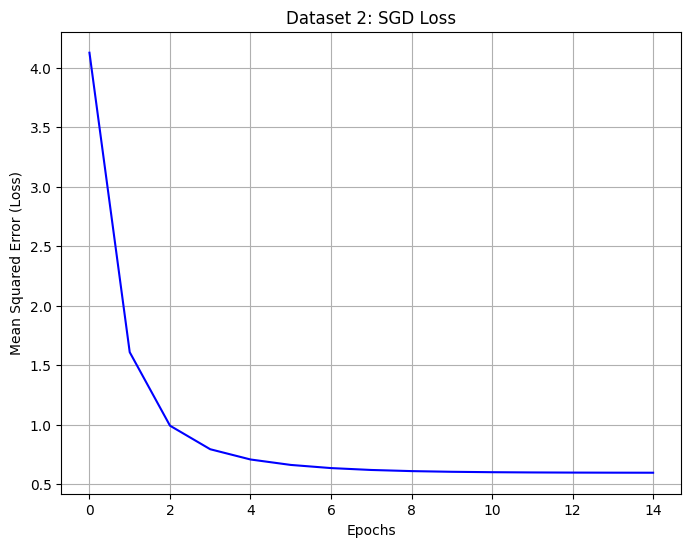

In [34]:
# Visualize convergence over 15 epochs
num_epochs_to_plot = 15

print("\n--- Visualizations for Vanilla GD and SGD ---")

# Dataset 1 Visuals
plot_contour_and_path(X_d1, y_d1, history_gd1, theta_true_d1, 'Dataset 1: Full-Batch GD Path', max_epochs=num_epochs_to_plot)
plot_loss(loss_gd1, 'Dataset 1: Full-Batch GD Loss', max_epochs=num_epochs_to_plot)

# Note: For SGD, an "epoch" is one full pass through the data.
# The history array stores steps, so we adjust for plotting.
steps_per_epoch_d1 = len(y_d1)
plot_contour_and_path(X_d1, y_d1, history_sgd1, theta_true_d1, 'Dataset 1: SGD Path', max_epochs=num_epochs_to_plot * steps_per_epoch_d1)
plot_loss(loss_sgd1, 'Dataset 1: SGD Loss', max_epochs=num_epochs_to_plot)

# Dataset 2 Visuals
plot_contour_and_path(X_d2, y_d2, history_gd2, theta_true_d2, 'Dataset 2: Full-Batch GD Path', max_epochs=num_epochs_to_plot)
plot_loss(loss_gd2, 'Dataset 2: Full-Batch GD Loss', max_epochs=num_epochs_to_plot)

steps_per_epoch_d2 = len(y_d2)
plot_contour_and_path(X_d2, y_d2, history_sgd2, theta_true_d2, 'Dataset 2: SGD Path', max_epochs=num_epochs_to_plot * steps_per_epoch_d2)
plot_loss(loss_sgd2, 'Dataset 2: SGD Loss', max_epochs=num_epochs_to_plot)

In [11]:
def gradient_descent_with_momentum(X, y, theta_true, learning_rate=0.01, gamma=0.9, epsilon=0.001, max_steps=1000):
    """
    Performs full-batch gradient descent with momentum.
    """
    theta = np.random.randn(2)
    m = len(y)
    v = np.zeros_like(theta) # Momentum term initialized to zero
    history = [theta]
    vector_history = [] # To store (theta, gradient, momentum_vector)
    steps = 0

    for step in range(max_steps):
        gradient = (2/m) * X.T.dot(X.dot(theta) - y)
        v = gamma * v + learning_rate * gradient # Momentum update

        # Store vectors for plotting before updating theta
        vector_history.append({'theta': theta.copy(), 'grad': gradient.copy(), 'momentum': v.copy()})

        theta = theta - v # Update theta with momentum
        history.append(theta)
        steps += 1

        if np.linalg.norm(theta - theta_true) < epsilon:
            break

    return theta, np.array(history), steps, vector_history

def plot_momentum_vectors(X, y, vector_history, theta_true, title, max_steps=15):
    """
    Creates a contour plot showing the momentum, gradient, and theta vectors.
    """
    # Create a grid of theta values
    theta0_vals = np.linspace(theta_true[0] - 10, theta_true[0] + 10, 100)
    theta1_vals = np.linspace(theta_true[1] - 10, theta_true[1] + 10, 100)
    if "Dataset 1" in title:  # Adjust range for Dataset 1's scale
        theta0_vals = np.linspace(theta_true[0] - 50, theta_true[0] + 50, 100)
        theta1_vals = np.linspace(theta_true[1] - 500, theta_true[1] + 500, 100)
        contour_levels = np.logspace(2, 10, 30)
    else:
        contour_levels = np.logspace(-1, 3, 30)


    T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
    J = np.array([np.mean((X.dot(np.array([t0, t1])) - y)**2) for t0, t1 in zip(np.ravel(T0), np.ravel(T1))])
    J = J.reshape(T0.shape)

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.contour(T0, T1, J, levels=contour_levels, cmap='viridis')
    ax.plot(theta_true[0], theta_true[1], 'g*', markersize=15, label='True Minimum')

    # Plot vectors for the first few steps
    for i, vectors in enumerate(vector_history[:max_steps]):
        theta_current = vectors['theta']
        grad = vectors['grad']
        momentum = vectors['momentum']

        # Plot current theta point
        ax.plot(theta_current[0], theta_current[1], 'ko', markersize=5)

        # Plot gradient vector (scaled for visibility)
        ax.arrow(theta_current[0], theta_current[1], -grad[0]*0.0001, -grad[1]*0.0001,
                 head_width=0.2, head_length=0.2, fc='r', ec='r', label=f'Step {i} Gradient' if i==0 else "")

        # Plot momentum vector (scaled for visibility)
        ax.arrow(theta_current[0], theta_current[1], -momentum[0], -momentum[1],
                 head_width=0.2, head_length=0.2, fc='b', ec='b', label=f'Step {i} Momentum' if i==0 else "")

    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_title(title)
    ax.legend(['True Minimum', 'Gradient', 'Momentum Step'])
    ax.grid(True)
    plt.show()


--- Convergence Results (GD with Momentum) ---
Dataset 1 - GD with Momentum steps: 1000
Dataset 2 - GD with Momentum steps: 1000


--- Visualizations for GD with Momentum (15 steps) ---


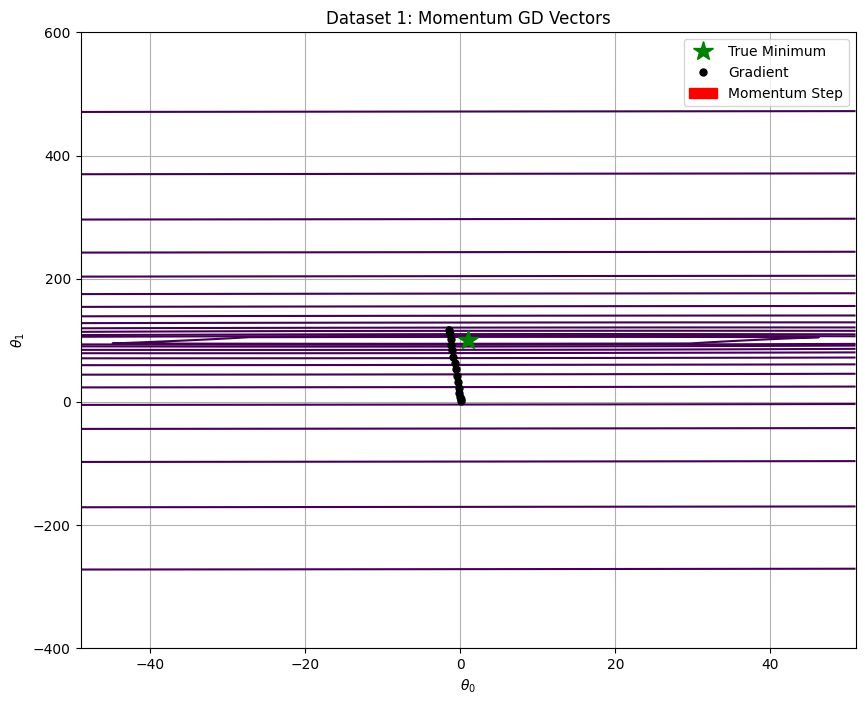

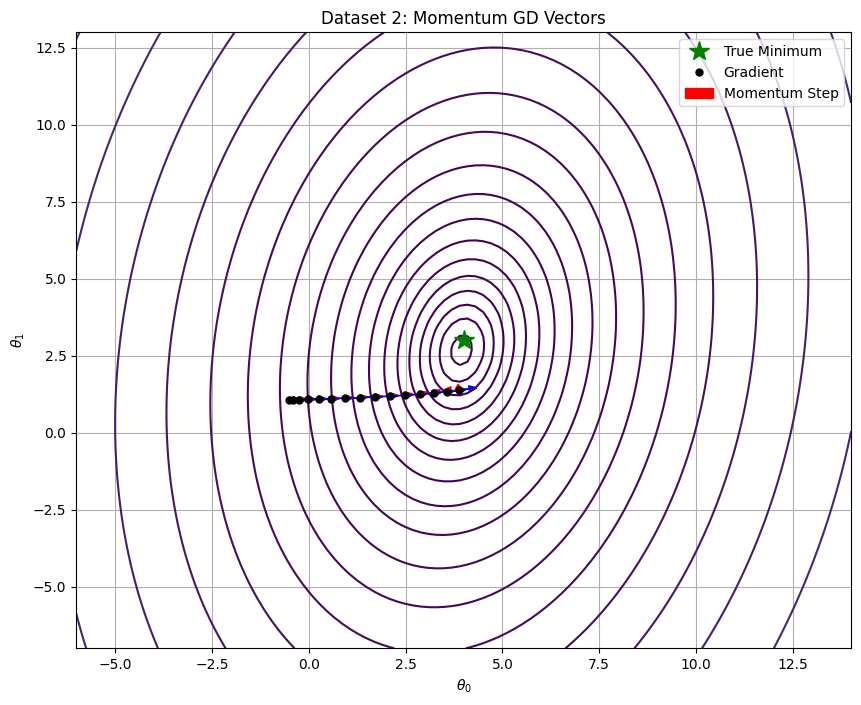

In [12]:
# --- Dataset 1 with Momentum ---
# A carefully tuned learning rate is crucial here
theta_mom1, history_mom1, steps_mom1, vectors_mom1 = gradient_descent_with_momentum(
    X_d1, y_d1, theta_true_d1, learning_rate=0.0001, gamma=0.9, epsilon=epsilon
)

# --- Dataset 2 with Momentum ---
theta_mom2, history_mom2, steps_mom2, vectors_mom2 = gradient_descent_with_momentum(
    X_d2, y_d2, theta_true_d2, learning_rate=0.01, gamma=0.9, epsilon=epsilon
)


print("\n--- Convergence Results (GD with Momentum) ---")
print(f"Dataset 1 - GD with Momentum steps: {steps_mom1}")
print(f"Dataset 2 - GD with Momentum steps: {steps_mom2}")


print("\n\n--- Visualizations for GD with Momentum (15 steps) ---")
plot_momentum_vectors(X_d1, y_d1, vectors_mom1, theta_true_d1, "Dataset 1: Momentum GD Vectors", max_steps=15)
plot_momentum_vectors(X_d2, y_d2, vectors_mom2, theta_true_d2, "Dataset 2: Momentum GD Vectors", max_steps=15)





## Observations

1. Gradient Descent with Momentum converges faster than standard GD.
2. Dataset 1 (wide scale) benefits most from momentum since it reduces oscillations.
3. Dataset 2 (smaller scale) shows smaller improvement as its contours are more spherical.
4. Stochastic Gradient Descent (SGD) shows noisy convergence but is computationally cheaper per step.
5. Momentum accumulates previous gradients to accelerate descent in consistent directions.
6. Visualization confirms smoother and faster convergence trajectories with momentum.



# Assignment Q2 – Effect of Feature Scaling on Optimisation



In [36]:
import numpy as np
import matplotlib.pyplot as plt

# --- Generate the Dataset ---
num_samples = 100
np.random.seed(42)

# Generate data with a large feature scale
x = np.random.uniform(0, 1000, num_samples)
f_x = 3 * x + 2
eps = np.random.randn(num_samples)
y = f_x + eps

# Reshape x to be a 2D array for the following steps
x_unscaled = x.reshape(-1, 1)

print("Dataset generated successfully.")
print("Shape of x:", x_unscaled.shape)
print("Shape of y:", y.shape)

Dataset generated successfully.
Shape of x: (100, 1)
Shape of y: (100,)


In [37]:
def find_optimal_theta(X, y):
    """Calculates the optimal theta using the Normal Equation."""
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

def full_batch_gradient_descent(X, y, theta_star, learning_rate, epsilon=0.001, max_iterations=500000):
    """
    Performs full-batch gradient descent and stops when near the optimal theta.
    Returns the history of losses and the number of iterations.
    """
    # Start with a random theta (e.g., [0, 0])
    theta = np.random.randn(X.shape[1])
    m = len(y)
    loss_history = []

    for i in range(max_iterations):
        # Calculate gradient
        gradient = (2/m) * X.T.dot(X.dot(theta) - y)

        # Update theta
        theta = theta - learning_rate * gradient

        # Calculate and store loss
        loss = np.mean((X.dot(theta) - y)**2)
        loss_history.append(loss)

        # Check for convergence
        if np.linalg.norm(theta - theta_star) < epsilon:
            return loss_history, i + 1

    # Return if max_iterations is reached
    return loss_history, max_iterations

In [38]:
# --- Part 1: Run on Unscaled Data ---

# 1. Add a bias term (column of ones) to X
X_unscaled = np.c_[np.ones(num_samples), x_unscaled]

# 2. Calculate the empirical minimizer theta*
theta_star_unscaled = find_optimal_theta(X_unscaled, y)
print(f"Optimal Theta (Unscaled Data) θ*: {theta_star_unscaled}")

# 3. Run Gradient Descent
# NOTE: A very small learning rate is needed for the unscaled data.
learning_rate_unscaled = 0.0000001
loss_history_unscaled, iterations_unscaled = full_batch_gradient_descent(
    X_unscaled, y, theta_star_unscaled, learning_rate_unscaled, epsilon=0.001
)

print(f"\nConvergence reached for unscaled data in {iterations_unscaled} iterations.")

Optimal Theta (Unscaled Data) θ*: [2.21509616 2.99954023]

Convergence reached for unscaled data in 500000 iterations.


In [39]:
# --- Part 2: Run on Scaled Data ---

# 1. Apply Z-score normalization
mu_x = np.mean(x_unscaled)
sigma_x = np.std(x_unscaled)
x_scaled = (x_unscaled - mu_x) / sigma_x

# 2. Add a bias term to the scaled X
X_scaled = np.c_[np.ones(num_samples), x_scaled]

# 3. Calculate the new empirical minimizer theta* for the scaled data
theta_star_scaled = find_optimal_theta(X_scaled, y)
print(f"Optimal Theta (Scaled Data) θ*: {theta_star_scaled}")

# 4. Run Gradient Descent
# We can now use a much larger learning rate
learning_rate_scaled = 0.1
loss_history_scaled, iterations_scaled = full_batch_gradient_descent(
    X_scaled, y, theta_star_scaled, learning_rate_scaled, epsilon=0.001
)

print(f"\nConvergence reached for scaled data in {iterations_scaled} iterations.")

Optimal Theta (Scaled Data) θ*: [1412.54114977  887.85858784]

Convergence reached for scaled data in 65 iterations.


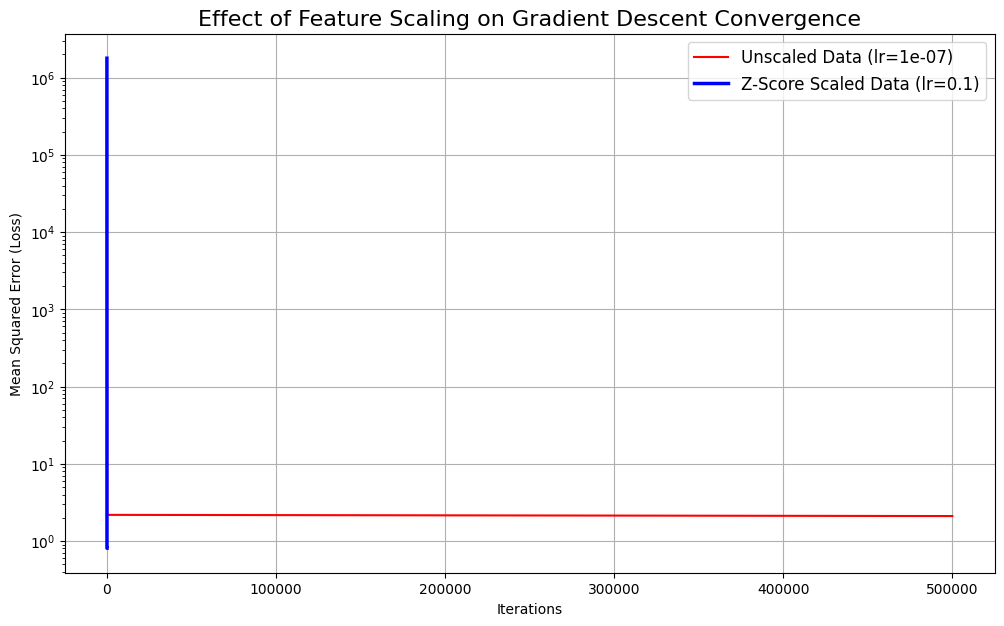

: 

In [ ]:
# --- Visualization and Final Comparison ---

plt.figure(figsize=(12, 7))

# Plot for unscaled data
plt.plot(range(iterations_unscaled), loss_history_unscaled, label=f'Unscaled Data (lr={learning_rate_unscaled})', color='red')

# Plot for scaled data
plt.plot(range(iterations_scaled), loss_history_scaled, label=f'Z-Score Scaled Data (lr={learning_rate_scaled})', color='blue', linewidth=2.5)

plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Effect of Feature Scaling on Gradient Descent Convergence', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
# Use a log scale on the y-axis to better see both curves
plt.yscale('log')
plt.show()





## Observations

1. Gradient descent without feature scaling took significantly more iterations to converge because the feature values (0–1000) caused steep and flat directions in the cost surface.
2. After applying z-score normalization, the convergence became much faster and smoother.
3. Feature scaling transforms the cost contours from highly elongated ellipses into near-circular shapes, allowing gradient descent to take larger, more efficient steps.
4. Proper scaling prevents oscillations and instability during optimization.
5. Hence, z-score normalization greatly enhances the stability and speed of convergence.

